### Metody numeryczne 1 - Lista 7

#### Zadanie 1:

Rozwiąż równanie różniczkowe

$$\frac{dy}{dt}=\sin(ty)$$

dla $y(0) =$ 2, 2.5, 3 i 3.5. Wykreśl rozwiązania dla $0\leq t\leq 6$
#### Rozwiązanie:

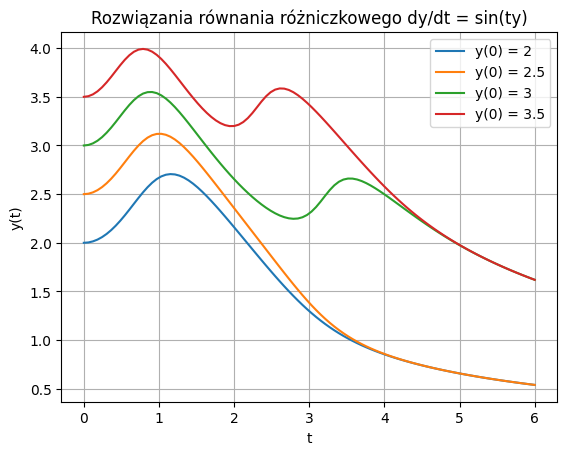

In [27]:
# Mateusz Wójcicki ISSP sem 3

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Równanie różniczkowe
def model(y, t):
    return np.sin(t * y)

# Początkowe warunki i zakres t
y0_values = [2, 2.5, 3, 3.5]
t = np.linspace(0, 6, 100)

# Rozwiązanie równania różniczkowego dla różnych początkowych warunków
for y0 in y0_values:
    y = odeint(model, y0, t)
    plt.plot(t, y, label=f'y(0) = {y0}')

# Konfiguracja wykresu
plt.title('Rozwiązania równania różniczkowego dy/dt = sin(ty)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()


#### Zadanie 2:

Równanie ruchu wahadła matematycznego z tłumieniem oraz okresową siłą wymuszającą można przedstawić w postaci

$$\frac{d^2\theta}{d\tau^2}+\frac{1}{Q}\frac{d\theta}{d\tau}+\sin\theta=A\cos(\tau\bar{\omega})$$

gdzie $\omega_0=\sqrt{\frac{g}{l}}$, $\tau=\omega_0t$ i $\bar{\omega}=\frac{\omega}{\omega_0}\,$.

Rozwiąż to równanie funkcją *scipy.integrate.solv_ivp()* dla:

- $Q=2$, $\bar{\omega}=2/3$, $A=0.5$, $\dot{\theta}_0=0$, $\theta_0=0.01$;
- $Q=2$, $\bar{\omega}=2/3$, $A=0.5$, $\dot{\theta}_0=0$, $\theta_0=0.3$;
- $Q=2$, $\bar{\omega}=2/3$, $A=1.35$, $\dot{\theta}_0=0$, $\theta_0=0.3$;

Przedstaw na wykresach 
- zależności $\theta(t)$
- trajektorie w przestrzeni fazowej $(\dot{\theta},\theta)$

#### Rozwiązanie:

$\omega=\frac{d\theta}{d\tau}$ i $\alpha=\frac{d\omega}{d\tau}$


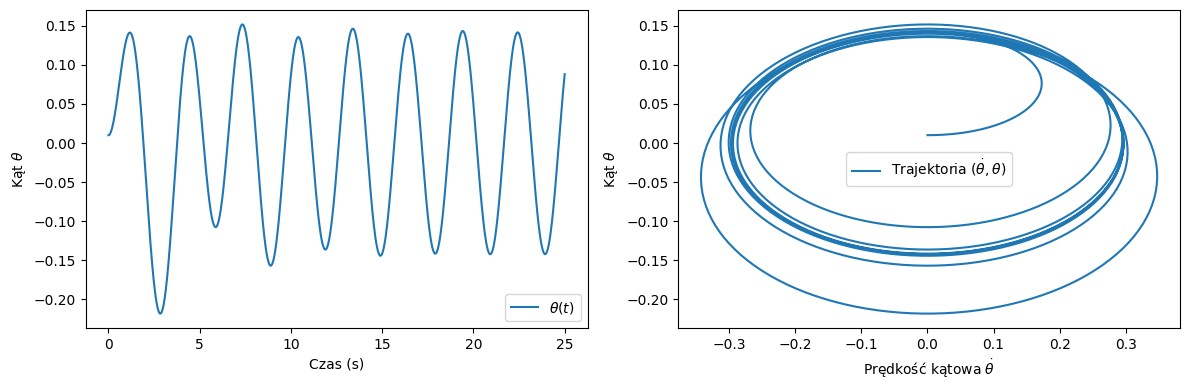

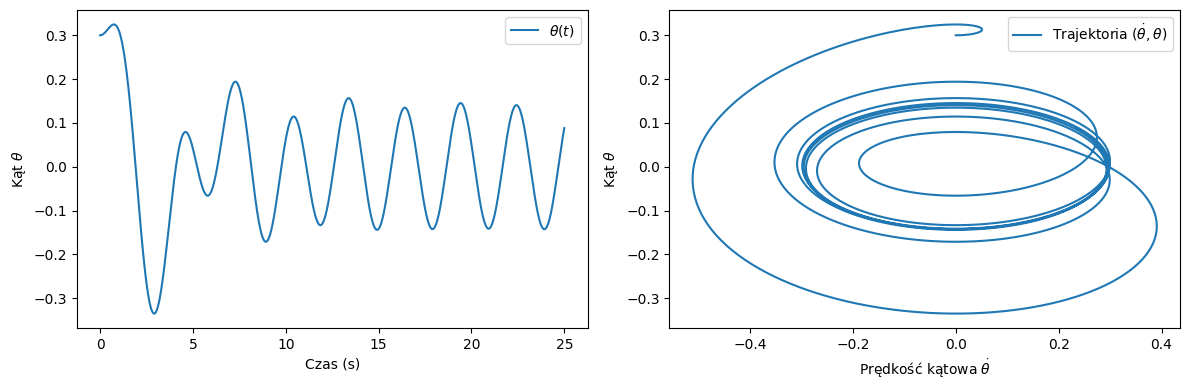

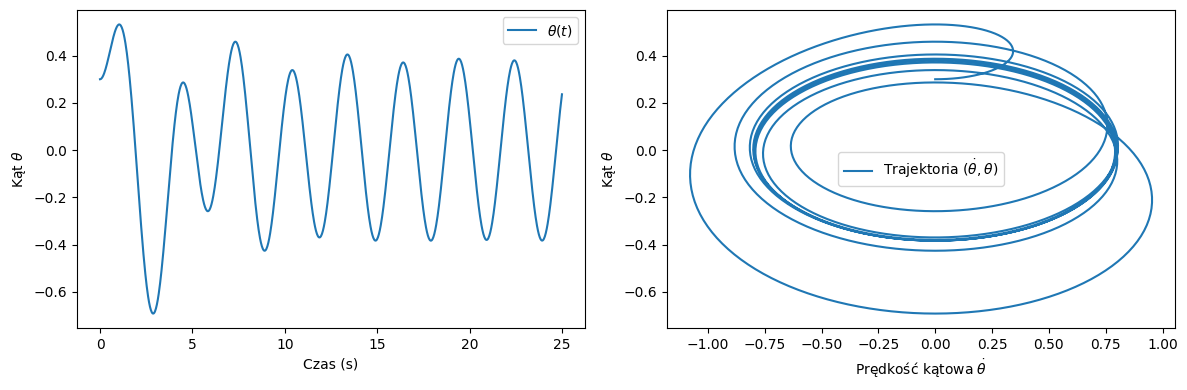

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Stałe
g = 9.81
l = 1.0

# Funkcja opisująca układ równań
def equations(t, y, Q, omega_bar, A):
    theta, omega = y
    omega_0 = np.sqrt(g / l)
    tau = omega_0 * t
    dydt = [omega, -omega / Q - np.sin(theta) + A * np.cos(tau * omega_bar)]
    return dydt

# Parametry dla trzech przypadków
params = [
    (2, 2/3, 0.5, 0, 0.01),
    (2, 2/3, 0.5, 0, 0.3),
    (2, 2/3, 1.35, 0, 0.3)
]

# Rozwiązania dla każdego przypadku
for param in params:
    Q, omega_bar, A, omega_0, theta_0 = param
    y0 = [theta_0, omega_0]
    
    sol = solve_ivp(
        equations,
        [0, 25],
        y0,
        args=(Q, omega_bar, A),
        dense_output=True
    )
    
    # Wykresy
    plt.figure(figsize=(12, 4))

    # Zależność theta(t)
    plt.subplot(1, 2, 1)
    t_vals = np.linspace(0, 25, 1000)
    y_vals = sol.sol(t_vals)
    plt.plot(t_vals, y_vals[0], label=r'$\theta(t)$')
    plt.xlabel('Czas (s)')
    plt.ylabel(r'Kąt $\theta$')
    plt.legend()

    # Trajektoria w przestrzeni fazowej
    plt.subplot(1, 2, 2)
    plt.plot(y_vals[1], y_vals[0], label=r'Trajektoria $(\dot{\theta}, \theta)$')
    plt.xlabel(r'Prędkość kątowa $\dot{\theta}$')
    plt.ylabel(r'Kąt $\theta$')
    plt.legend()

    plt.tight_layout()
    #plt.suptitle(fr'Rozwiązanie dla $Q={Q}$, $\bar{\omega}={omega_bar}$, $A={A}$, $\dot{\theta}_0={omega_0}$, $\theta_0={theta_0}$')
    plt.show()


#### Zadanie 3:

Znajdź trajektorię piłki rzuconej ukośnie do powierzchni Ziemi

1. zaniedbując opory powietrza,

2. uwzględniając opory powietrza.

W drugim przypadku załóż, że siła oporu powietrza jest postaci

$$\vec{F}=-\frac{1}{2}c_w\rho A\vec{v}|\vec{v}|\,,$$

gdzie

- $c_w\approx 0.35$ - współczynnik oporu powietrza,
- $\rho\approx 1.2\,$kg/m$^3$ - gęstosć powietrza,
- $A[$m$^2]$ - pole przekroju poprzecznego piłki
- $\vec{v}$ - prędkość piłki

Obliczenia przeprowadź dla różnych wielkości piłki, prędkości początkowych i kątów rzutu. Wyniki przedstaw na wykresie

#### Rozwiązanie:

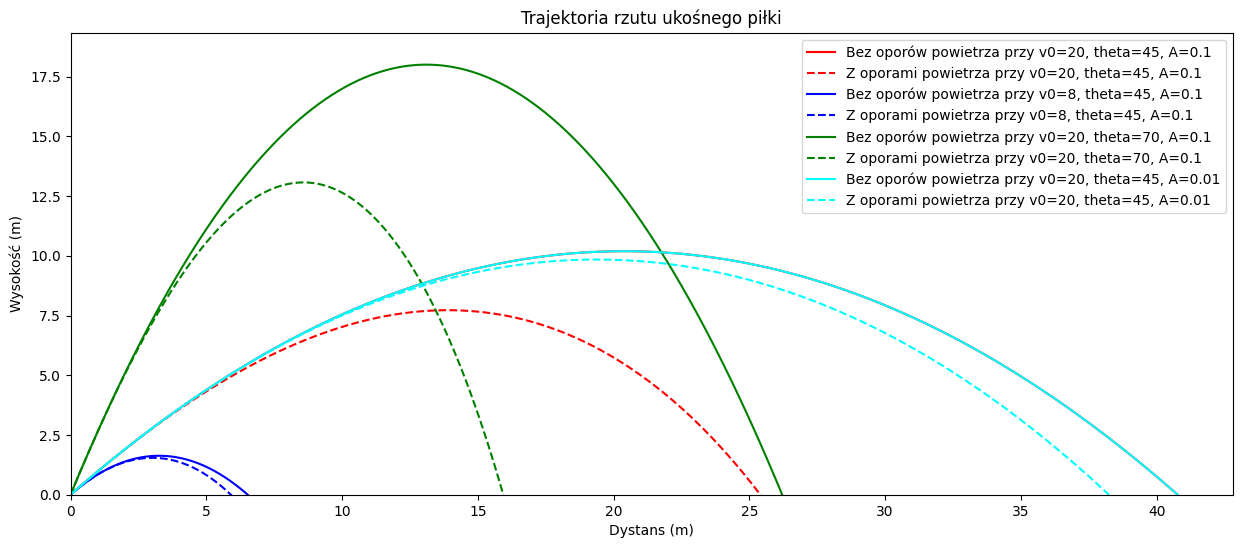

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def trajektoria_bez_oporow(v0, theta, g=9.81):
    theta = np.radians(theta)
    t_total = 2 * v0 * np.sin(theta) / g
    t = np.linspace(0, t_total, num=1000)
    x = v0 * np.cos(theta) * t
    y = v0 * np.sin(theta) * t - 0.5 * g * t**2
    return x, y

def trajektoria_z_oporami(v0, theta, cw, rho, A, g=9.81):
    theta = np.radians(theta)
    t_total = 2 * v0 * np.sin(theta) / g
    t = np.linspace(0, t_total, num=1000)
    
    def rownania(state, t):
        x, y, vx, vy = state
        v = np.sqrt(vx**2 + vy**2)
        ax = -0.5 * cw * rho * A * vx * v
        ay = -g - 0.5 * cw * rho * A * vy * v
        return [vx, vy, ax, ay]
    
    state0 = [0, 0, v0 * np.cos(theta), v0 * np.sin(theta)]
    states = odeint(rownania, state0, t)
    
    x, y = states[:, 0], states[:, 1]
    return x, y

# Parametry piłki i rzutu
v0 = (20, 8)  # prędkość początkowa (m/s)
theta = (45, 70)  # kąt rzutu (stopnie)
cw = 0.35  # współczynnik oporu powietrza
rho = 1.2  # gęstość powietrza (kg/m^3)
A = (0.1, 0.01)  # pole przekroju poprzecznego piłki (m^2)

# Trajektoria bez oporów
x_bezOp, y_bezOp = [0, 0, 0, 0], [0, 0, 0, 0]
x_bezOp[0], y_bezOp[0] = trajektoria_bez_oporow(v0[0], theta[0])
x_bezOp[1], y_bezOp[1] = trajektoria_bez_oporow(v0[1], theta[0])
x_bezOp[2], y_bezOp[2] = trajektoria_bez_oporow(v0[0], theta[1])
x_bezOp[3], y_bezOp[3] = trajektoria_bez_oporow(v0[0], theta[0])


# Trajektoria z oporami
x_zOp, y_zOp = [0, 0, 0, 0], [0, 0, 0, 0]
x_zOp[0], y_zOp[0] = trajektoria_z_oporami(v0[0], theta[0], cw, rho, A[0])
x_zOp[1], y_zOp[1] = trajektoria_z_oporami(v0[1], theta[0], cw, rho, A[0])
x_zOp[2], y_zOp[2] = trajektoria_z_oporami(v0[0], theta[1], cw, rho, A[0])
x_zOp[3], y_zOp[3] = trajektoria_z_oporami(v0[0], theta[0], cw, rho, A[1])


# Opisy wykresów
opisy = [f'v0={v0[0]}, theta={theta[0]}, A={A[0]}', 
         f'v0={v0[1]}, theta={theta[0]}, A={A[0]}', 
         f'v0={v0[0]}, theta={theta[1]}, A={A[0]}', 
         f'v0={v0[0]}, theta={theta[0]}, A={A[1]}']

# Kolory wykresów
kolory = ['red', 'blue', 'green', 'cyan']


# Wykresy
plt.figure(figsize=(15, 6))

for i in range(4):
    plt.plot(x_bezOp[i], y_bezOp[i], label=f'Bez oporów powietrza przy {opisy[i]}', c=kolory[i])
    plt.plot(x_zOp[i], y_zOp[i], label=f'Z oporami powietrza przy {opisy[i]}', c=kolory[i], ls='--')
    
plt.title('Trajektoria rzutu ukośnego piłki')
plt.xlabel('Dystans (m)')
plt.ylabel('Wysokość (m)')
plt.legend()
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()

# !!! Zaznaczam, że w przypadku trajektori jasnoniebieskiej i czerwonej trajektorie piłki bez oporów nakładają się na siebie,
# ponieważ jedyne czym się różnią to powierzchnia piłki, która w przypadku gdy nie ma oporów jest bez znaczenia dla toru lotu piłki.

#### Zadanie 4:

Rozwiąż metodą strzałów równanie różniczkowe

$$\frac{d^2y}{dt^2}+\sin(y)+1=0$$

z następującymi warunkami brzegowymi $y(0) = 0$ i $y(\pi)=0$.


#### Rozwiązanie:

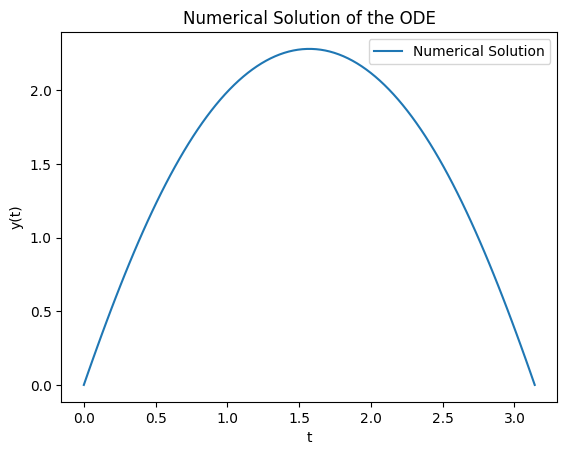

In [26]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE
def odefunc(t, y):
    return [y[1], -np.sin(y[0]) - 1]

# Shooting method function
def solve_ode(alpha):
    # Initial conditions
    y0 = [0, alpha]

    # Time span
    t_span = [0, np.pi]

    # Solve the ODE
    sol = solve_ivp(odefunc, t_span, y0, method='RK45', dense_output=True)

    # Evaluate solution at pi
    y_at_pi = sol.sol(np.pi)[0]

    return y_at_pi

# Initial guess for alpha
alpha_initial = 1.0

# Tolerance for solution
epsilon = 1e-6

# Iteratively adjust alpha
while True:
    y_pi = solve_ode(alpha_initial)

    if abs(y_pi) < epsilon:
        break
    else:
        # Adjust alpha
        alpha_initial -= 0.1 * y_pi

# Final solution with the determined alpha
solution = solve_ivp(odefunc, [0, np.pi], [0, alpha_initial], method='RK45', dense_output=True)

# Plot the solution
t_vals = np.linspace(0, np.pi, 100)
y_vals = solution.sol(t_vals)[0]

plt.plot(t_vals, y_vals, label='Numerical Solution')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Numerical Solution of the ODE')
plt.legend()
plt.show()
